##### torchvision 제공 이미지 전처리 관련 기능
- torchvision.transforms 서브모듈
    * 이미지 크기 조절
    * 이미지 정규화
    * 이미지 자르기
    * 이미지 회전 등등 다양한 기능 제공
    * 이미지 데이터 타입 ==> Pillow Image

- 모듈 로딩 및 데이터 설정 <hr>

In [19]:
import cv2                              # ==> 이미지 데이터 ndarray
from PIL import Image                   # %pip install pillow ==> 이미지 데이터 JpegImage
import numpy as np
import matplotlib.pyplot as plt

from torchvision import transforms      # Pytorch 지우너 이미지 변환 관련 모듈
import torch


In [20]:
## 데이터 관련 설정
IMG_PATH = '../data/'
IMG_FILE = IMG_PATH + 'cat.jpg'

- openCV & pillow <hr>

In [21]:
cv_img = cv2.imread(IMG_FILE)
# cv_img = cv2.cvtColor(cv_img, cv2.COLOR_BGR2RGB) # BGR ==> RGB

pil_img = Image.open(IMG_FILE)

In [22]:
print(f"type(cv_img)  : {type(cv_img)}")
print(F"type(pil_img) : {type(pil_img)}")

type(cv_img)  : <class 'numpy.ndarray'>
type(pil_img) : <class 'PIL.JpegImagePlugin.JpegImageFile'>


- ndarray ==> Tensor <hr>

In [23]:
# 일반적인 텐서 생성 [H, W, C]
cvTensor1 = torch.tensor(cv_img)
print(f"cvTensor1  : {cvTensor1.shape}, {cvTensor1.ndim}D")

# 이미지용 텐서 생성 ==> 채널 순서/위치 자동 [C, H, W]
cvTensor2 = transforms.ToTensor()(cv_img)
print(f"cvTensor2  : {cvTensor2.shape}, {cvTensor2.ndim}D")

cvTensor1  : torch.Size([259, 194, 3]), 3D
cvTensor2  : torch.Size([3, 259, 194]), 3D


In [24]:
# 일반적인 텐서 생성 [H, W, C]
pilTensor1 = torch.tensor(np.array(pil_img))
print(f'pitTensor1  : {pilTensor1.shape}, {pilTensor1.ndim}D')

# 이미지용 텐서 생성 ==> 채널 순서/위치 자동 [C, H, W]
pilTensor2 = transforms.ToTensor()(np.array(pil_img))
print(f"pilTensor2  : {pilTensor2.shape}, {pilTensor2.ndim}D")

pilTensor3 = transforms.PILToTensor()(pil_img)
print(f"pilTensor3  : {pilTensor3.shape}, {pilTensor3.ndim}D")

pitTensor1  : torch.Size([259, 194, 3]), 3D
pilTensor2  : torch.Size([3, 259, 194]), 3D
pilTensor3  : torch.Size([3, 259, 194]), 3D


- Tensor ==> Ndarray <hr>

cvNP  : (259, 194, 3), 3D


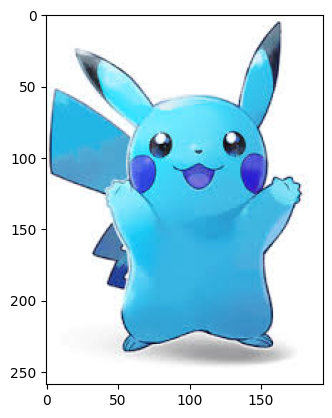

In [28]:
cvNP = cvTensor1.numpy()
print(f'cvNP  : {cvNP.shape}, {cvNP.ndim}D')

plt.imshow(cvNP)
plt.show()

In [37]:
from torchvision.transforms import v2

v2.ToImage()(cv_img).shape

torch.Size([3, 259, 194])

- Tensor ===> PIL Image <hr>

In [38]:
pilIMG1 = transforms.ToPILImage()(pilTensor2)
print(f'pilIMG1  : {pilIMG1.width}, {pilIMG1.height}, {pilIMG1.mode}')
pilIMG1.show()

pilIMG1  : 194, 259, RGB
